In [2]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

%matplotlib inline

In [3]:
data = pd.read_csv("/content/drive/MyDrive/ML Datasets/Regression/Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
data.shape

(200, 5)

<Axes: xlabel='newspaper', ylabel='sales'>

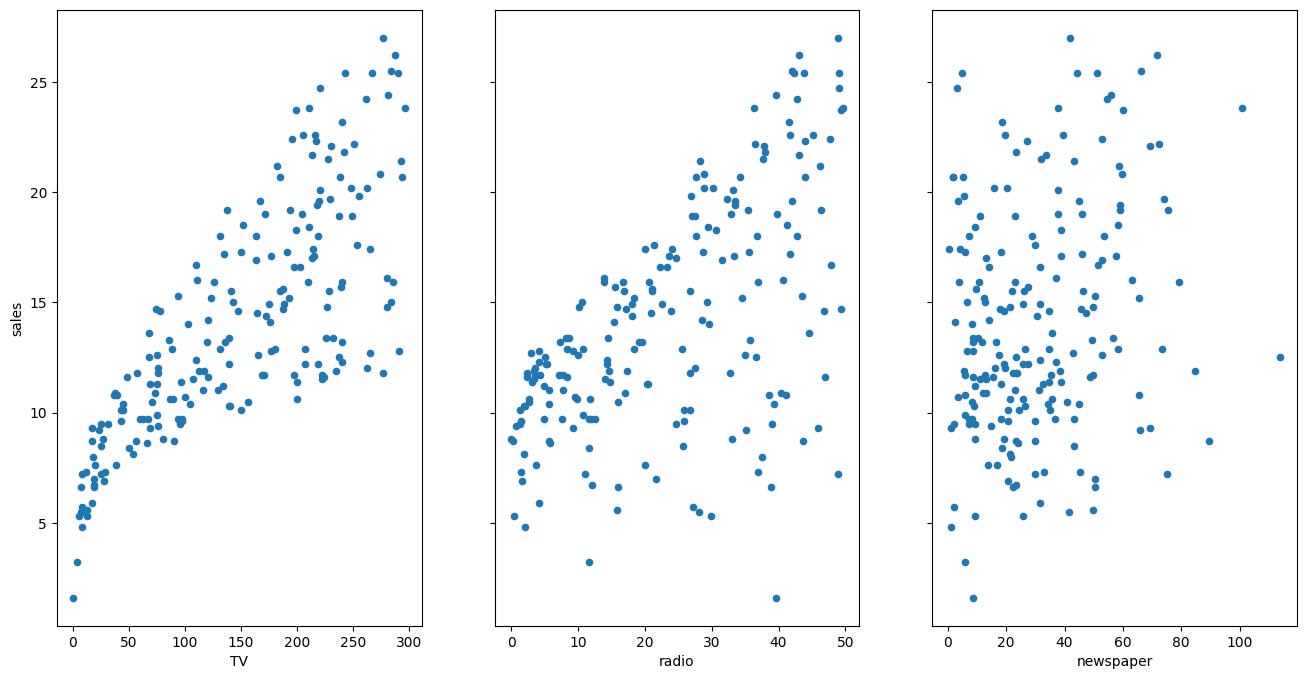

In [6]:
fig, axs = plt.subplots(1,3,sharey = True)
data.plot(kind = 'scatter', x = 'TV', y = 'sales', ax = axs[0], figsize = (16,8))
data.plot(kind = 'scatter', x = 'radio', y = 'sales', ax = axs[1], figsize = (16,8))
data.plot(kind = 'scatter', x = 'newspaper', y = 'sales', ax = axs[2], figsize = (16,8))

## Building A Regression Model Based On Single Feature

### Tv

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(data[['TV']],data['sales'])

LinearRegression()

In [10]:
print(lr.coef_)
print(lr.intercept_)

[0.04753664]
7.032593549127695


In [12]:
X_new = pd.DataFrame({'TV' : [data['TV'].min(), data['TV'].max()]})
preds = lr.predict(X_new)

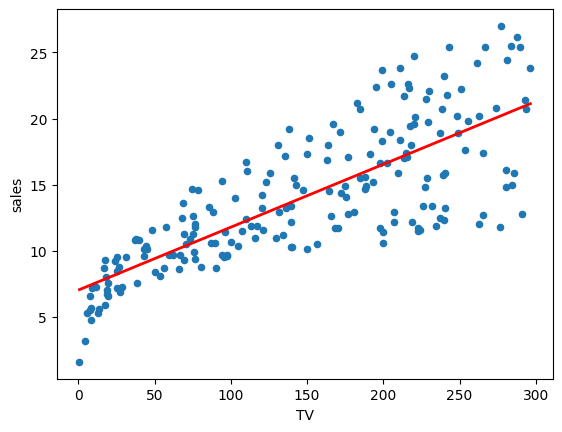

In [13]:
data.plot(kind='scatter', x = 'TV', y = 'sales')
plt.plot(X_new,preds,c = 'red', linewidth = 2)

In [15]:
import statsmodels.formula.api as smf
lr_stats = smf.ols(formula = 'sales ~ TV', data = data).fit()

In [16]:
lr_stats.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [18]:
lr_stats.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [19]:
lr_stats.rsquared

0.611875050850071

### Radio

In [20]:
lr1 = LinearRegression()
lr1.fit(data[['radio']],data['sales'])

LinearRegression()

In [21]:
print(lr1.coef_)
print(lr1.intercept_)

[0.20249578]
9.311638095158283


In [22]:
X_new1 = pd.DataFrame({'radio' : [data['radio'].min(), data['radio'].max()]})
preds1 = lr1.predict(X_new1)

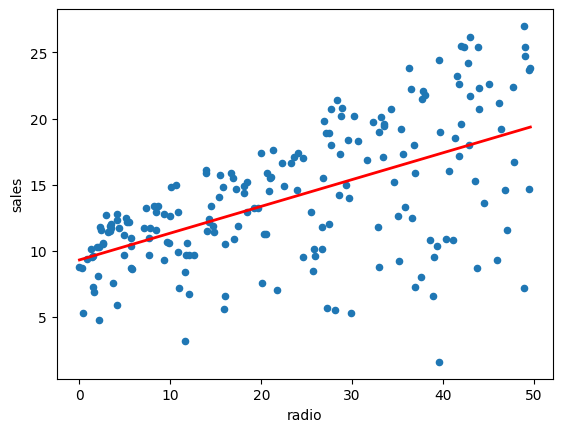

In [23]:
data.plot(kind='scatter', x = 'radio', y = 'sales')
plt.plot(X_new1, preds1, c = 'red', linewidth = 2)

In [24]:
lr_stats1 = smf.ols(formula = 'sales ~ radio', data = data).fit()
lr_stats1.conf_int()

,0,1
Intercept,8.201588,10.421688
radio,0.162244,0.242747


In [25]:
lr_stats1.pvalues

Intercept    3.561071e-39
radio        4.354966e-19
dtype: float64

In [26]:
lr_stats1.rsquared

0.33203245544529547

### Newspaper

In [27]:
lr2 = LinearRegression()
lr2.fit(data[['newspaper']],data['sales'])

LinearRegression()

In [28]:
print(lr2.coef_)
print(lr2.intercept_)

[0.0546931]
12.35140706927816


In [30]:
X_new2 = pd.DataFrame({'newspaper' : [data['newspaper'].min(), data['newspaper'].max()]})
preds2 = lr2.predict(X_new2)

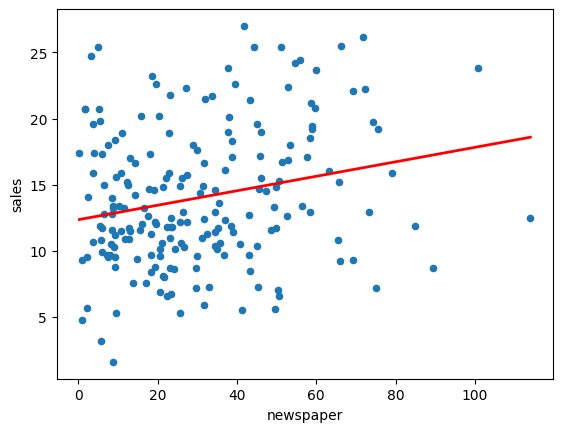

In [31]:
data.plot(kind='scatter', x = 'newspaper', y = 'sales')
plt.plot(X_new2,preds2,c = 'red', linewidth = 2)

In [33]:
lr_stats2 = smf.ols(formula = 'sales ~ newspaper', data = data).fit()
lr_stats2.conf_int()

,0,1
Intercept,11.125956,13.576859
newspaper,0.022005,0.087381


In [34]:
lr_stats2.pvalues

Intercept    4.713507e-49
newspaper    1.148196e-03
dtype: float64

In [36]:
lr_stats2.rsquared

0.05212044544430516

### Build A Multiple Linear Regression Model

In [43]:
feature_cols = ['TV','radio','newspaper']
X = data[feature_cols]
y = data['sales']
from sklearn import model_selection
X_train, X_test , y_train, y_test = model_selection.train_test_split(X,y,test_size = 0.2, random_state = 42)

In [44]:
lm = LinearRegression()
lm.fit(X,y)
print(lm.coef_)
print(lm.intercept_)

[ 0.04576465  0.18853002 -0.00103749]
2.938889369459412


In [45]:
y_pred = lm.predict(X_test)
print(sqrt(mean_squared_error(y_test,y_pred)))

1.7446869494731094


In [48]:
lm_stats = smf.ols(formula = 'sales ~ TV + radio + newspaper', data = data).fit()
lm_stats.conf_int()

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
radio,0.171547,0.205513
newspaper,-0.012616,0.010541


In [49]:
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           1.58e-96
Time:                        15:58:37   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
lm1 = smf.ols(formula = 'sales ~ TV + radio', data = data).fit()
lm1.rsquared

0.8971942610828956